In [98]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support
import warnings
import os
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

In [9]:

# Load the dataset
a1 = pd.read_excel("/home/jyotishr/CreditRiskModelling/case_study1.xlsx")
a2 = pd.read_excel("/home/jyotishr/CreditRiskModelling/case_study2.xlsx")

In [37]:
df1 = a1.copy()
df2 = a2.copy()

In [12]:
df1.head(3)

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,5,4,1,0,0,0.000,0.0,0.2,0.8,...,0,0,1,0,4,1,4,0,72,18
1,2,1,0,1,0,0,0.000,0.0,1.0,0.0,...,0,1,0,0,0,0,1,0,7,7
2,3,8,0,8,1,0,0.125,0.0,1.0,0.0,...,0,6,1,0,0,2,6,0,47,2


In [13]:
df2.head(5)

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,549,35,15,11,29,29,0,0,0,...,0.0,0.0,0.0,13.333,1,0,PL,PL,696,P2
1,2,47,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,0.860,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,302,11,3,9,25,25,1,9,8,...,0.0,0.0,0.0,5741.667,1,0,ConsumerLoan,others,693,P2
3,4,-99999,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,9.900,0,0,others,others,673,P2
4,5,583,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,-99999.000,0,0,AL,AL,753,P1


In [24]:
print(df1.shape,df2.shape)

(51336, 26) (51336, 62)


In [38]:
# Remove nulls in df1


columns_with_null = df1.columns[df1.isin([-99999]).any()].tolist()
print(df1.shape, columns_with_null)

df1 = df1.loc[df1['Age_Oldest_TL'] != -99999]

print(df1.shape)
columns_with_null = df1.columns[df1.isin([-99999]).any()].tolist()
columns_with_null


(51336, 26) ['Age_Oldest_TL', 'Age_Newest_TL']
(51296, 26)


[]

In [39]:
columns_to_be_removed = []

for i in df2.columns:
    if df2.loc[df2[i] == -99999].shape[0] > 10000:
        columns_to_be_removed .append(i)
        
columns_to_be_removed


['time_since_first_deliquency',
 'time_since_recent_deliquency',
 'max_delinquency_level',
 'max_deliq_6mts',
 'max_deliq_12mts',
 'CC_utilization',
 'PL_utilization',
 'max_unsec_exposure_inPct']

In [40]:
df2 = df2.drop(columns_to_be_removed, axis =1)

In [41]:
# remove rows with null values
for i in df2.columns:
    df2 = df2.loc[ df2[i] != -99999 ]

In [42]:

# Checking common column names
for i in list(df1.columns):
    if i in list(df2.columns):
        print (i)


PROSPECTID


In [45]:
# Merge the two dataframes, inner join so that no nulls are present
df = pd. merge ( df1, df2, how ='inner', left_on = ['PROSPECTID'], right_on = ['PROSPECTID'] )

In [52]:
print(df.shape)
df.head(5)

(42064, 79)


,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,5,4,1,0,0,0.000,0.0,0.200,0.800,...,0.0,0.0,0.000,0.0,1,0,PL,PL,696,P2
1,2,1,0,1,0,0,0.000,0.0,1.000,0.000,...,0.0,0.0,0.000,0.0,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,8,0,8,1,0,0.125,0.0,1.000,0.000,...,0.0,0.0,0.000,0.0,1,0,ConsumerLoan,others,693,P2
3,5,3,2,1,0,0,0.000,0.0,0.333,0.667,...,0.0,0.0,0.000,0.0,0,0,AL,AL,753,P1
4,6,6,5,1,0,0,0.000,0.0,0.167,0.833,...,1.0,0.0,0.429,0.0,1,0,ConsumerLoan,PL,668,P3


In [47]:
# check how many columns are categorical
for i in df.columns:
    if df[i].dtype == 'object':
        print(i)

MARITALSTATUS
EDUCATION
GENDER
last_prod_enq2
first_prod_enq2
Approved_Flag


In [53]:
# Chi-square test
for i in ['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2']:
    chi2, pval, _, _ = chi2_contingency(pd.crosstab(df[i], df['Approved_Flag']))
    print(i, '---', pval)
# Since all the categorical features have pval <=0.05, we will accept all


MARITALSTATUS --- 3.578180861038862e-233
EDUCATION --- 2.6942265249737532e-30
GENDER --- 1.907936100186563e-05
last_prod_enq2 --- 0.0
first_prod_enq2 --- 7.84997610555419e-287


In [62]:
# VIF for numerical columns
numeric_columns = []
for i in df.columns:
    if df[i].dtype != 'object' and i not in ['PROSPECTID','Approved_Flag']:
        numeric_columns.append(i)


# VIF sequentially check

vif_data = df[numeric_columns]
total_columns = vif_data.shape[1]
columns_to_be_kept = []
column_index = 0


for i in range (0,total_columns):
    
    vif_value = variance_inflation_factor(vif_data, column_index)
    # print (column_index,'---',vif_value)
    
    
    if vif_value <= 6:
        columns_to_be_kept.append( numeric_columns[i] )
        column_index = column_index+1
    
    else:
        print(f'{numeric_columns[i]} is multicollinear')
        vif_data = vif_data.drop([ numeric_columns[i] ] , axis=1)
        

/home/jyotishr/.venv/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Total_TL is multicollinear


/home/jyotishr/.venv/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Tot_Closed_TL is multicollinear
Tot_Active_TL is multicollinear
Total_TL_opened_L6M is multicollinear
Tot_TL_closed_L6M is multicollinear


/home/jyotishr/.venv/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


pct_active_tl is multicollinear
pct_closed_tl is multicollinear
Total_TL_opened_L12M is multicollinear
pct_tl_open_L12M is multicollinear


/home/jyotishr/.venv/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Auto_TL is multicollinear
Consumer_TL is multicollinear
Gold_TL is multicollinear
num_times_delinquent is multicollinear


/home/jyotishr/.venv/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


num_deliq_6mts is multicollinear
num_deliq_12mts is multicollinear
num_times_30p_dpd is multicollinear
num_std is multicollinear
num_std_6mts is multicollinear
num_dbt_6mts is multicollinear
num_lss_6mts is multicollinear
tot_enq is multicollinear
CC_enq is multicollinear
CC_enq_L6m is multicollinear
PL_enq is multicollinear
PL_enq_L6m is multicollinear
enq_L12m is multicollinear
enq_L6m is multicollinear
AGE is multicollinear
pct_of_active_TLs_ever is multicollinear
pct_opened_TLs_L6m_of_L12m is multicollinear
pct_PL_enq_L6m_of_L12m is multicollinear
pct_CC_enq_L6m_of_L12m is multicollinear
Credit_Score is multicollinear


In [63]:
len(columns_to_be_kept)

39

In [64]:
# check Anova for columns_to_be_kept among numerical columns

from scipy.stats import f_oneway

columns_to_be_kept_numerical = []

for i in columns_to_be_kept:
    a = list(df[i])  
    b = list(df['Approved_Flag'])  
    
    group_P1 = [value for value, group in zip(a, b) if group == 'P1']
    group_P2 = [value for value, group in zip(a, b) if group == 'P2']
    group_P3 = [value for value, group in zip(a, b) if group == 'P3']
    group_P4 = [value for value, group in zip(a, b) if group == 'P4']


    f_statistic, p_value = f_oneway(group_P1, group_P2, group_P3, group_P4)

    if p_value <= 0.05:
        columns_to_be_kept_numerical.append(i)

In [65]:
len(columns_to_be_kept_numerical)

37

In [74]:
# feature selection is done for cat and num features

# listing all the final features
features = columns_to_be_kept_numerical + ['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2']
df = df[features + ['Approved_Flag']]
df.shape

(42064, 43)

In [70]:
print(df['MARITALSTATUS'].unique())    
print(df['EDUCATION'].unique())
print(df['GENDER'].unique())
print(df['last_prod_enq2'].unique())
print(df['first_prod_enq2'].unique())

# Ordinal feature -- EDUCATION only needed rest one hot encoding
# SSC            : 1
# 12TH           : 2
# GRADUATE       : 3
# UNDER GRADUATE : 3
# POST-GRADUATE  : 4
# OTHERS         : 1
# PROFESSIONAL   : 3

['Married' 'Single']
['12TH' 'GRADUATE' 'SSC' 'POST-GRADUATE' 'UNDER GRADUATE' 'OTHERS'
 'PROFESSIONAL']
['M' 'F']
['PL' 'ConsumerLoan' 'AL' 'CC' 'others' 'HL']
['PL' 'ConsumerLoan' 'others' 'AL' 'HL' 'CC']


In [78]:
df.loc[df['EDUCATION'] == 'SSC',['EDUCATION']]              = 1
df.loc[df['EDUCATION'] == '12TH',['EDUCATION']]             = 2
df.loc[df['EDUCATION'] == 'GRADUATE',['EDUCATION']]         = 3
df.loc[df['EDUCATION'] == 'UNDER GRADUATE',['EDUCATION']]   = 3
df.loc[df['EDUCATION'] == 'POST-GRADUATE',['EDUCATION']]    = 4
df.loc[df['EDUCATION'] == 'OTHERS',['EDUCATION']]           = 1
df.loc[df['EDUCATION'] == 'PROFESSIONAL',['EDUCATION']]     = 3




print(df['EDUCATION'].value_counts())
df['EDUCATION'] = df['EDUCATION'].astype(int)


EDUCATION
3    18931
2    11703
1     9532
4     1898
Name: count, dtype: int64


In [80]:
# one hot encoding

df_encoded = pd.get_dummies(df, columns=['MARITALSTATUS','GENDER', 'last_prod_enq2' ,'first_prod_enq2'])



df_encoded.info()
k = df_encoded.describe()

df_encoded.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42064 entries, 0 to 42063
Data columns (total 55 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   pct_tl_open_L6M               42064 non-null  float64
 1   pct_tl_closed_L6M             42064 non-null  float64
 2   Tot_TL_closed_L12M            42064 non-null  int64  
 3   pct_tl_closed_L12M            42064 non-null  float64
 4   Tot_Missed_Pmnt               42064 non-null  int64  
 5   CC_TL                         42064 non-null  int64  
 6   Home_TL                       42064 non-null  int64  
 7   PL_TL                         42064 non-null  int64  
 8   Secured_TL                    42064 non-null  int64  
 9   Unsecured_TL                  42064 non-null  int64  
 10  Other_TL                      42064 non-null  int64  
 11  Age_Oldest_TL                 42064 non-null  int64  
 12  Age_Newest_TL                 42064 non-null  int64  
 13  t

(42064, 55)

In [85]:
# Machine Learing model fitting

# 1. Decision Tree
from sklearn.tree import DecisionTreeClassifier


y = df_encoded['Approved_Flag']
x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


dt_model = DecisionTreeClassifier(max_depth=20, min_samples_split=10)
dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print ()
print(f"Accuracy: {accuracy:.2f}")
print ()

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()


Accuracy: 0.71

Class p1:
Precision: 0.7237354085603113
Recall: 0.7337278106508875
F1 Score: 0.7286973555337904

Class p2:
Precision: 0.809198986552329
Recall: 0.8229930624380575
F1 Score: 0.8160377358490566

Class p3:
Precision: 0.346031746031746
Recall: 0.3290566037735849
F1 Score: 0.33733075435203097

Class p4:
Precision: 0.6498993963782697
Recall: 0.6277939747327502
F1 Score: 0.6386554621848739



In [86]:

# 2. Random Forest

y = df_encoded['Approved_Flag']
x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators = 200, random_state=42)
rf_classifier.fit(x_train, y_train)
y_pred = rf_classifier.predict(x_test)



accuracy = accuracy_score(y_test, y_pred)
print ()
print(f'Accuracy: {accuracy}')
print ()
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)


for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()


Accuracy: 0.7636990372043266

Class p1:
Precision: 0.8370457209847597
Recall: 0.7041420118343196
F1 Score: 0.7648634172469202

Class p2:
Precision: 0.7957519116397621
Recall: 0.9282457879088206
F1 Score: 0.856907593778591

Class p3:
Precision: 0.4423380726698262
Recall: 0.21132075471698114
F1 Score: 0.28600612870275793

Class p4:
Precision: 0.7178502879078695
Recall: 0.7269193391642371
F1 Score: 0.7223563495895703



In [87]:
# 3. xgboost

import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

xgb_classifier = xgb.XGBClassifier(objective='multi:softmax',  num_class=4)


y = df_encoded['Approved_Flag']
x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)




xgb_classifier.fit(x_train, y_train)
y_pred = xgb_classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print ()
print(f'Accuracy: {accuracy:.2f}')
print ()

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()



Accuracy: 0.78

Class p1:
Precision: 0.823906083244397
Recall: 0.7613412228796844
F1 Score: 0.7913890312660175

Class p2:
Precision: 0.8255418233924413
Recall: 0.913577799801784
F1 Score: 0.8673315769665035

Class p3:
Precision: 0.4756380510440835
Recall: 0.30943396226415093
F1 Score: 0.37494284407864653

Class p4:
Precision: 0.7342386032977691
Recall: 0.7356656948493683
F1 Score: 0.7349514563106796



In [94]:
df_encoded.shape

(42064, 55)

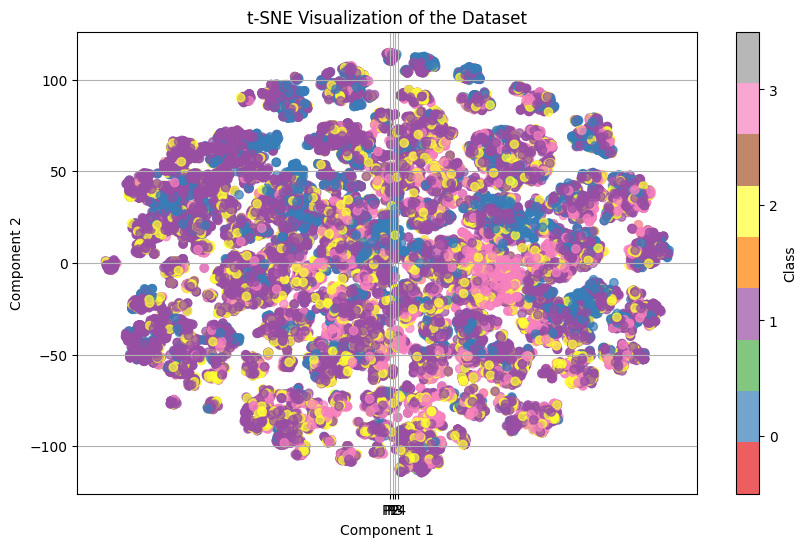

In [97]:
# visualiza for better idea why class 3 is performing badly


# Step 1: Separate features and target
features = df_encoded.drop('Approved_Flag', axis=1)
target = df_encoded['Approved_Flag']

# Step 2: Encode the target variable to numeric values
label_encoder = LabelEncoder()
target = label_encoder.fit_transform(target)

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 3: Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(features_scaled)

# Step 4: Create a new DataFrame for t-SNE results
tsne_df = pd.DataFrame(data=tsne_results, columns=['Component 1', 'Component 2'])
tsne_df['Approved_Flag'] = target

plt.figure(figsize=(10, 6))
scatter = plt.scatter(tsne_df['Component 1'], tsne_df['Component 2'], 
                      c=tsne_df['Approved_Flag'], cmap='Set1', alpha=0.7)  # Changed colormap to 'Set1'
plt.title('t-SNE Visualization of the Dataset')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(scatter, ticks=range(len(label_encoder.classes_)), label='Class')
plt.clim(-0.5, len(label_encoder.classes_) - 0.5)  # Adjust color limits for better visualization
plt.xticks(ticks=range(len(label_encoder.classes_)), labels=label_encoder.classes_)  # Add class labels to colorbar
plt.grid()  # Optional: Add grid for better readability
plt.show()


In [99]:
from sklearn.preprocessing import StandardScaler

columns_to_be_scaled = ['Age_Oldest_TL','Age_Newest_TL','time_since_recent_payment',
'max_recent_level_of_deliq','recent_level_of_deliq',
'time_since_recent_enq','NETMONTHLYINCOME','Time_With_Curr_Empr']

for i in columns_to_be_scaled:
    column_data = df_encoded[i].values.reshape(-1, 1)
    scaler = StandardScaler()
    scaled_column = scaler.fit_transform(column_data)
    df_encoded[i] = scaled_column



import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

xgb_classifier = xgb.XGBClassifier(objective='multi:softmax',  num_class=4)



y = df_encoded['Approved_Flag']
x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)




xgb_classifier.fit(x_train, y_train)
y_pred = xgb_classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()
    

Accuracy: 0.78
Class p1:
Precision: 0.823906083244397
Recall: 0.7613412228796844
F1 Score: 0.7913890312660175

Class p2:
Precision: 0.8255418233924413
Recall: 0.913577799801784
F1 Score: 0.8673315769665035

Class p3:
Precision: 0.4756380510440835
Recall: 0.30943396226415093
F1 Score: 0.37494284407864653

Class p4:
Precision: 0.7342386032977691
Recall: 0.7356656948493683
F1 Score: 0.7349514563106796



In [100]:
# Hyperparameter tuning in xgboost
from sklearn.model_selection import GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

# Define the XGBClassifier with the initial set of hyperparameters
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=4)

# Define the parameter grid for hyperparameter tuning

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the model with the best hyperparameters on the test set
best_model = grid_search.best_estimator_
accuracy = best_model.score(x_test, y_test)
print("Test Accuracy:", accuracy)

# Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}

Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
Test Accuracy: 0.7811719957209081


In [102]:



# Based on risk appetite of the bank, you will suggest P1,P2,P3,P4 to the business end user

# Hyperparameter tuning for xgboost (Used in the session)

# Define the hyperparameter grid
param_grid = {
  'colsample_bytree': [0.1, 0.3, 0.5, 0.7, 0.9],
  'learning_rate'   : [0.001, 0.01, 0.1, 1],
  'max_depth'       : [3, 5, 8, 10],
  'alpha'           : [1, 10, 100],
  'n_estimators'    : [10,50,100]
}

index = 0

answers_grid = {
    'combination'       :[],
    'train_Accuracy'    :[],
    'test_Accuracy'     :[],
    'colsample_bytree'  :[],
    'learning_rate'     :[],
    'max_depth'         :[],
    'alpha'             :[],
    'n_estimators'      :[]

    }


# Loop through each combination of hyperparameters
for colsample_bytree in param_grid['colsample_bytree']:
  for learning_rate in param_grid['learning_rate']:
    for max_depth in param_grid['max_depth']:
      for alpha in param_grid['alpha']:
          for n_estimators in param_grid['n_estimators']:
             
              index = index + 1
             
              # Define and train the XGBoost model
              model = xgb.XGBClassifier(objective='multi:softmax',  
                                       num_class=4,
                                       colsample_bytree = colsample_bytree,
                                       learning_rate = learning_rate,
                                       max_depth = max_depth,
                                       alpha = alpha,
                                       n_estimators = n_estimators)
               
       
                     
              y = df_encoded['Approved_Flag']
              x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )

              label_encoder = LabelEncoder()
              y_encoded = label_encoder.fit_transform(y)


              x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)


              model.fit(x_train, y_train)
  

       
              # Predict on training and testing sets
              y_pred_train = model.predict(x_train)
              y_pred_test = model.predict(x_test)
       
       
              # Calculate train and test results
              
              train_accuracy =  accuracy_score (y_train, y_pred_train)
              test_accuracy  =  accuracy_score (y_test , y_pred_test)
              
              
       
              # Include into the lists
              answers_grid ['combination']   .append(index)
              answers_grid ['train_Accuracy']    .append(train_accuracy)
              answers_grid ['test_Accuracy']     .append(test_accuracy)
              answers_grid ['colsample_bytree']   .append(colsample_bytree)
              answers_grid ['learning_rate']      .append(learning_rate)
              answers_grid ['max_depth']          .append(max_depth)
              answers_grid ['alpha']              .append(alpha)
              answers_grid ['n_estimators']       .append(n_estimators)
       
       
              # Print results for this combination
              print(f"Combination {index}")
              print(f"colsample_bytree: {colsample_bytree}, learning_rate: {learning_rate}, max_depth: {max_depth}, alpha: {alpha}, n_estimators: {n_estimators}")
              print(f"Train Accuracy: {train_accuracy:.2f}")
              print(f"Test Accuracy : {test_accuracy :.2f}")
              print("-" * 30)










Combination 1
colsample_bytree: 0.1, learning_rate: 0.001, max_depth: 3, alpha: 1, n_estimators: 10
Train Accuracy: 0.62
Test Accuracy : 0.62
------------------------------
Combination 2
colsample_bytree: 0.1, learning_rate: 0.001, max_depth: 3, alpha: 1, n_estimators: 50
Train Accuracy: 0.61
Test Accuracy : 0.60
------------------------------
Combination 3
colsample_bytree: 0.1, learning_rate: 0.001, max_depth: 3, alpha: 1, n_estimators: 100
Train Accuracy: 0.61
Test Accuracy : 0.60
------------------------------
Combination 4
colsample_bytree: 0.1, learning_rate: 0.001, max_depth: 3, alpha: 10, n_estimators: 10
Train Accuracy: 0.62
Test Accuracy : 0.62
------------------------------
Combination 5
colsample_bytree: 0.1, learning_rate: 0.001, max_depth: 3, alpha: 10, n_estimators: 50
Train Accuracy: 0.61
Test Accuracy : 0.60
------------------------------
Combination 6
colsample_bytree: 0.1, learning_rate: 0.001, max_depth: 3, alpha: 10, n_estimators: 100
Train Accuracy: 0.61
Test Accu